In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [3]:
#Data Collection and Processing
bike_dataset = pd.read_csv('Bike Prices.csv')

In [4]:
# inspecting the first five rows of the dataframe
bike_dataset.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [5]:
# checking the number of rows and columns
bike_dataset.shape

(1061, 8)

In [6]:
# getting some information about the datasets
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [7]:
# checking the number of missing values
bike_dataset.isnull().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

In [8]:
# checking the distribution of categorical data
print(bike_dataset.Brand.value_counts())
print(bike_dataset.Seller_Type.value_counts())
print(bike_dataset.Owner.value_counts())

Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Vespa         4
Kawasaki      4
Activa        3
UM            3
Jawa          3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: Brand, dtype: int64
Individual    1055
Dealer           6
Name: Seller_Type, dtype: int64
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: Owner, dtype: int64


In [9]:
# encoding the categorical data
# endcoding "Seller_Type" column
bike_dataset.replace({'Seller_Type':{'Individual':1,'Dealer':0}},inplace = True)

# encoding 'Owner' column
bike_dataset.replace({'Owner':{'1st owner':1,'2nd owner':2,'3rd owner':3,'4th owner':4}},inplace = True)

#encoding "Brand" column
bike_dataset.replace({'Brand':{'Bajaj':1,'Hero':2,'Honda':3,'Royal':4,'Yamaha':5,'TVS':6,'Suzuki':7,'KTM':8,'Mahindra':9,'Vespa':10,'Kawasaki':11,'Activa':12,'UM':13,'Jawa':14,'Harley':15,'Aprilia':16,'Yo':17,'Benelli':18,'Hyosung':19,'BMW':20}},inplace = True)

In [10]:
bike_dataset.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,6,TVS XL 100,30000,2017,1,1,8000,30490.0
1,1,Bajaj ct 100,18000,2017,1,1,35000,32000.0
2,17,Yo Style,20000,2011,1,1,10000,37675.0
3,1,Bajaj Discover 100,25000,2010,1,1,43000,42859.0
4,1,Bajaj Discover 100,24999,2012,1,2,35000,42859.0


In [11]:
# Splitting the data and target
X = bike_dataset.drop(['Selling_Price','Model','Ex_Showroom_Price'],axis =1)
Y = bike_dataset['Selling_Price']

In [12]:
print(X)

      Brand  Year  Seller_Type  Owner  KM_Driven
0         6  2017            1      1       8000
1         1  2017            1      1      35000
2        17  2011            1      1      10000
3         1  2010            1      1      43000
4         1  2012            1      2      35000
...     ...   ...          ...    ...        ...
1056      4  2012            1      1      40000
1057      2  2010            1      1      17000
1058      1  2014            1      1      16000
1059      2  2009            1      1      50000
1060      2  2012            1      1      60000

[1061 rows x 5 columns]


In [13]:
print(Y)

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
1056    90000
1057    20000
1058    60000
1059    40000
1060    35000
Name: Selling_Price, Length: 1061, dtype: int64


In [14]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [15]:
# Model training
# 1. Linear Regression
#  --->loading the linear regression model
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# Model Evaluation
 # --> Prediciton on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R sqaured Error: ", error_score)

R sqaured Error:  0.2937588527186368


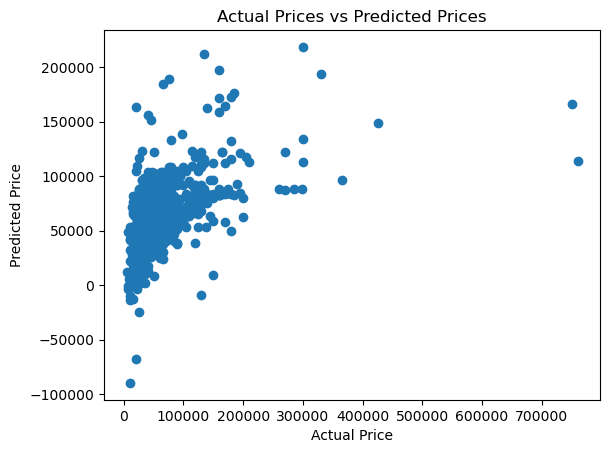

In [19]:
# Visualize the actual price and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [20]:
# --> Prediciton on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [21]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R sqaured Error: ", error_score)

R sqaured Error:  0.3960905859346088


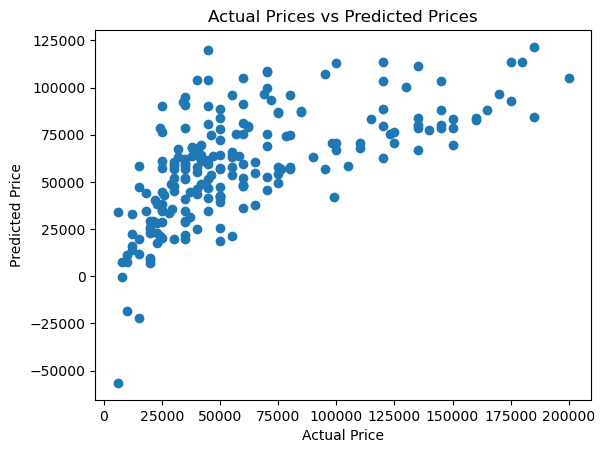

In [22]:
# Visualize the actual price and predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()